### PHASE 1: DATA GATHERING:
Create a graph of Rivers State using osmnx, retrieve nodes from googlemaps api and store everything as a .geojson file.


In [36]:
!pip install osmnx
import osmnx as ox
import matplotlib.pyplot as plt

In [37]:
import geopandas as gpd
from shapely.ops import unary_union
from shapely.geometry import Point
import pandas as pd

In [38]:
from google.colab import drive
drive.mount('/content/drive')
project_implementation_folder = "/content/drive/MyDrive/Final Year Project/Project Code, Resources and Implementation"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
all_local_govs = gpd.read_file("/content/drive/MyDrive/Final Year Project/Project Code, Resources and Implementation/Resources/geoBoundaries-NGA-ADM2.geojson")

## Codebase Redo


In [40]:
# Get Obio-akpor Boundaries
lga = all_local_govs[all_local_govs["shapeName"] == "Obio/Akpor"]

# Base GeoDataFrame
base_gdf = gpd.GeoDataFrame(geometry=lga.geometry, crs="EPSG:4326")

# Road network
road_network = ox.graph_from_polygon(lga.geometry.iloc[0], network_type="drive")
road_edges_gdf = ox.graph_to_gdfs(road_network, nodes=False, edges=True)


In [41]:
'''
# Plot all together

ax = base_gdf.plot(facecolor="black", edgecolor="black", figsize=(12,12), linewidth=2)
road_edges_gdf.plot(ax=ax, linewidth=1, edgecolor="gray")
hospitals_gdf.plot(ax=ax, color="orange", markersize=50, marker="o")
plt.title("Obio/Akpor: Roads and Hospitals", fontsize=16)
plt.show()
'''

'\n# Plot all together\n\nax = base_gdf.plot(facecolor="black", edgecolor="black", figsize=(12,12), linewidth=2)\nroad_edges_gdf.plot(ax=ax, linewidth=1, edgecolor="gray")\nhospitals_gdf.plot(ax=ax, color="orange", markersize=50, marker="o")\nplt.title("Obio/Akpor: Roads and Hospitals", fontsize=16)\nplt.show()\n'

### NOTE
OpenStreetMaps is not rich in nodes we're interested in(hospitals) so, what I did was manually create and update a csv file that contains all hospitals in the study region and their rating. It is these hospitals that we'll be plotting on our base map no longer the ones already integrated into OpenStreetMaps.
```# Hospitals and clinics
tags = {"amenity": ["hospital", "clinic"]}
hospitals_gdf = ox.features.features_from_polygon(lga.geometry.iloc[0], tags=tags)
hospitals_gdf = hospitals_gdf[["name", "geometry"]].dropna(subset=["name"])

```
In the next couple of cells we'll import that file into this notebook, convert to geodataframe and layer on our base map

In [42]:
# Load hospitals from CSV
hospital_data = pd.read_csv("/content/drive/MyDrive/Final Year Project/Project Code, Resources and Implementation/Resources/hospital_data.csv.csv")

print(hospital_data.head())
print(hospital_data.columns)


                                            name  latitude  longitude  \
0                          Obio Cottage Hospital  4.826647   7.038318   
1                             RAHI Hospitals Ltd  4.882853   6.936570   
2  St. William's Alpha Specialist Medical Centre  4.876807   6.933337   
3                     Ozuoba Primary Health Care  4.871316   6.929127   
4                      St. Jude's Medical Clinic  4.848118   7.064447   

   serviceQualityRating  reviewCount  adjustedRating  
0                   4.0           82        4.036909  
1                   4.1           15        4.150420  
2                   5.0            3        4.294118  
3                   3.5           13        3.917112  
4                   3.7           15        3.978992  
Index(['name', 'latitude', 'longitude', 'serviceQualityRating', 'reviewCount',
       'adjustedRating'],
      dtype='object')


The study takes into account hospital service rating and while this value can seem really good for the analysis it can also skew analysis results as one 5 star rating would weigh more than fifty 4.5 star ratings which is simply misleading.
As a quick get-around, we'll be using the Bayesian average adjustment:

```adjustedRating=(v/v + m)R + (m/v + m)C```

With:


*   R = hospital's average rating
*   v = number of reviews
*   C = global mean rating across all hospitals
*   m = minimum reviews threshold


In [43]:
C = hospital_data["serviceQualityRating"].mean()
m = 20
# Adjust ratings
hospital_data["adjustedRating"] = (
    (hospital_data["reviewCount"] / (hospital_data["reviewCount"] + m)) * hospital_data["serviceQualityRating"] +
    (m / (hospital_data["reviewCount"] + m)) * C
)
# csv update
hospital_data.to_csv("/content/drive/MyDrive/Final Year Project/Project Code, Resources and Implementation/Resources/hospital_data.csv.csv", index=False)

# Convert hospitals DataFrame to GeoDataFrame
hospital_gdf = gpd.GeoDataFrame(
    hospital_data,
    geometry=gpd.points_from_xy(hospital_data.longitude, hospital_data.latitude),
    crs="EPSG:4326"  # WGS84 coordinate system
)

In [44]:
# Keep only hospitals within the study polygon
hospital_gdf = hospital_gdf[hospital_gdf.within(base_gdf.union_all())]


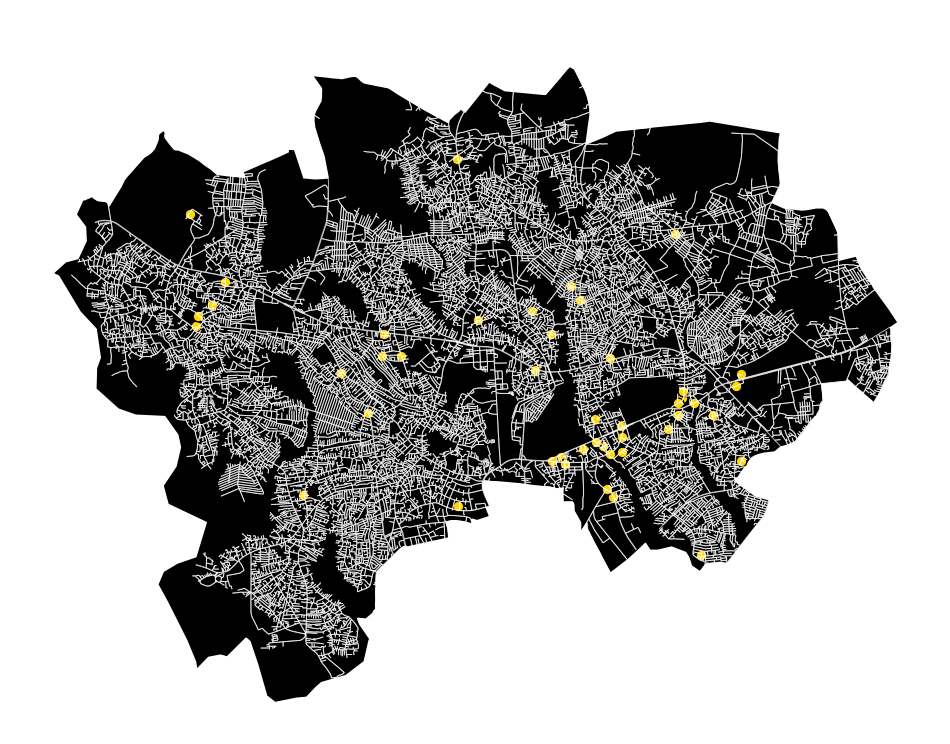

In [45]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.set_facecolor("black")

# Study region polygon
base_gdf.plot(ax=ax, facecolor="black", edgecolor="white", linewidth=1.2)
road_edges_gdf.plot(ax=ax, linewidth=0.7, edgecolor="white", alpha=0.7)
# Hospitals
hospital_gdf.plot(ax=ax, color="gold", edgecolor="black", markersize=60, marker="o")

ax.set_axis_off()
plt.title("Obio/Akpor: Roads and Hospitals", color="white", fontsize=16)
plt.show()


In [46]:
%cd "/content/drive/MyDrive/Final Year Project/Project Code, Resources and Implementation/Resources"

/content/drive/MyDrive/Final Year Project/Project Code, Resources and Implementation/Resources


In [47]:
%cd ..

/content/drive/MyDrive/Final Year Project/Project Code, Resources and Implementation


In [48]:
'''
!git config --global user.name "SIEcoder"
!git config --global user.email "smartemmanuel1234@gmail.com"
'''

'\n!git config --global user.name "SIEcoder"\n!git config --global user.email "smartemmanuel1234@gmail.com"\n'

In [49]:
!git init
!git config --global user.name "SIEcoder"
!git config --global user.email "smartemmanuel1234@gmail.com"
!git add .
!git commit -m "Initial commit: Phase 1 complete, data prep and visualization"
!git branch -M main
!git remote add origin https://github.com/SIEcoder/Emergency-Routing-Project.git
!git push -u origin main
#https://github.com/SIEcoder/Emergency-Routing-Project

Reinitialized existing Git repository in /content/drive/MyDrive/Final Year Project/Project Code, Resources and Implementation/.git/
[main f5a9df7] Initial commit: Phase 1 complete, data prep and visualization
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite Emergency_Routing_Project.ipynb (99%)
error: remote origin already exists.
remote: Repository not found.
fatal: repository 'https://github.com/SIEcoder/Emergency_Routing_Project.git/' not found
